# Pre-Margin Linking Replicating Contract Charts

This notebook creates the plots for Figures 9 and 10. They are just like plots 7 and 8 except they use the from the pre-margin linking period.

In [1]:
import os
import sys
import re

from itertools import *
from operator import mul
from functools import reduce
import pickle

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

idx = pd.IndexSlice

from research_tools import storage

pd.options.display.float_format = lambda x: '{:,.4f}'.format(x) if abs(x) < 1 else '{:,.2f}'.format(x)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#555555', label='Yes Contracts', markersize=10),
    Line2D([0], [0], marker='X', color='w', markerfacecolor='#555555', label='No Contracts', markersize=10)
]

# Load Data

In [2]:
os.chdir('..')

basename = 'dem'

dem_replicating_contracts, = storage.retrieve_all([basename + '.replicating_contracts'])

basename = 'gop'

rep_replicating_contracts, = storage.retrieve_all([basename + '.replicating_contracts'])

Reading data from data/dem.replicating_contracts.p
Reading data from data/gop.replicating_contracts.p


In [3]:
dem_replicating_contracts.keys()

dict_keys(['yes contracts spreads but no fees', 'yes contracts no spreads or fees', 'no contracts spreads but no fees', 'no contracts no spreads or fees', 'no contracts spreads and fees', 'yes contracts spreads and fees'])

In [4]:
dem_trader_analysis1_yes = dem_replicating_contracts['yes contracts no spreads or fees']
dem_trader_analysis1_no = dem_replicating_contracts['no contracts no spreads or fees']

rep_trader_analysis1_yes = rep_replicating_contracts['yes contracts no spreads or fees']
rep_trader_analysis1_no = rep_replicating_contracts['no contracts no spreads or fees']

dem_trader_analysis2_yes = dem_replicating_contracts['yes contracts spreads but no fees']
dem_trader_analysis2_no = dem_replicating_contracts['no contracts spreads but no fees']

rep_trader_analysis2_yes = rep_replicating_contracts['yes contracts spreads but no fees']
rep_trader_analysis2_no = rep_replicating_contracts['no contracts spreads but no fees']

dem_trader_analysis3_yes = dem_replicating_contracts['yes contracts spreads and fees']
dem_trader_analysis3_no = dem_replicating_contracts['no contracts spreads and fees']

rep_trader_analysis3_yes = rep_replicating_contracts['yes contracts spreads and fees']
rep_trader_analysis3_no = rep_replicating_contracts['no contracts spreads and fees']

#  Limits

These charts are similar to the ones created in the "Replicating Contract Charts" notebook except the data used is only for the pre-margin linking period.

In [5]:
rep_margin_linking_cutoff_date = '2015-12-01'
dem_margin_linking_cutoff_date = '2015-10-22'

replication_share_qty_cutoff = 10

In [6]:
# only use trades after the dem margin linking cutoff date
dem_trader_analysis1_yes = dem_trader_analysis1_yes[
    dem_trader_analysis1_yes.loc[idx[:, ('_trades', 'date_executed')]] <= dem_margin_linking_cutoff_date]
dem_trader_analysis1_no = dem_trader_analysis1_no[
    dem_trader_analysis1_no.loc[idx[:, ('_trades', 'date_executed')]] <= dem_margin_linking_cutoff_date]

dem_trader_analysis2_yes = dem_trader_analysis2_yes[
    dem_trader_analysis2_yes.loc[idx[:, ('_trades', 'date_executed')]] <= dem_margin_linking_cutoff_date]
dem_trader_analysis2_no = dem_trader_analysis2_no[
    dem_trader_analysis2_no.loc[idx[:, ('_trades', 'date_executed')]] <= dem_margin_linking_cutoff_date]

dem_trader_analysis3_yes = dem_trader_analysis3_yes[
    dem_trader_analysis3_yes.loc[idx[:, ('_trades', 'date_executed')]] <= dem_margin_linking_cutoff_date]
dem_trader_analysis3_no = dem_trader_analysis3_no[
    dem_trader_analysis3_no.loc[idx[:, ('_trades', 'date_executed')]] <= dem_margin_linking_cutoff_date]

# only use trades after the rep margin linking cutoff date
rep_trader_analysis1_yes = rep_trader_analysis1_yes[
    rep_trader_analysis1_yes.loc[idx[:, ('_trades', 'date_executed')]] <= rep_margin_linking_cutoff_date]
rep_trader_analysis1_no = rep_trader_analysis1_no[
    rep_trader_analysis1_no.loc[idx[:, ('_trades', 'date_executed')]] <= rep_margin_linking_cutoff_date]

rep_trader_analysis2_yes = rep_trader_analysis2_yes[
    rep_trader_analysis2_yes.loc[idx[:, ('_trades', 'date_executed')]] <= rep_margin_linking_cutoff_date]
rep_trader_analysis2_no = rep_trader_analysis2_no[
    rep_trader_analysis2_no.loc[idx[:, ('_trades', 'date_executed')]] <= rep_margin_linking_cutoff_date]

rep_trader_analysis3_yes = rep_trader_analysis3_yes[
    rep_trader_analysis3_yes.loc[idx[:, ('_trades', 'date_executed')]] <= rep_margin_linking_cutoff_date]
rep_trader_analysis3_no = rep_trader_analysis3_no[
    rep_trader_analysis3_no.loc[idx[:, ('_trades', 'date_executed')]] <= rep_margin_linking_cutoff_date]

In [7]:
dem_trader_analysis1_no = dem_trader_analysis1_no[
    dem_trader_analysis1_no[('replication', 'd')].abs() < replication_share_qty_cutoff]

dem_trader_analysis2_no = dem_trader_analysis2_no[
    dem_trader_analysis2_no[('replication', 'd')].abs() < replication_share_qty_cutoff]

rep_trader_analysis1_no = rep_trader_analysis1_no[
    rep_trader_analysis1_no[('replication', 'd')].abs() < replication_share_qty_cutoff]

rep_trader_analysis2_no = rep_trader_analysis2_no[
    rep_trader_analysis2_no[('replication', 'd')].abs() < replication_share_qty_cutoff]

def get_max_value(d_dict):
    try:
        d_dict = eval(d_dict)
        d_dict.pop('contracts')
        return max(d_dict.values())
    except:
        return np.nan

dem_trader_analysis3_no = dem_trader_analysis3_no[
    dem_trader_analysis3_no[('replication', 'd')].apply(get_max_value) < replication_share_qty_cutoff]

rep_trader_analysis3_no = rep_trader_analysis3_no[
    rep_trader_analysis3_no[('replication', 'd')].apply(get_max_value) < replication_share_qty_cutoff]

# No Spreads or Fees

In [8]:
!mkdir -p charts

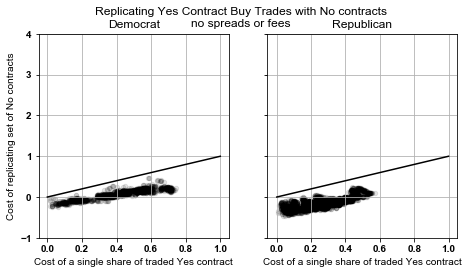

In [9]:
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 10}

mpl.rc('font', **font)

fig = plt.figure(figsize=(7.5, 3.75))

ax1 = plt.subplot(121)

dem_trader_analysis1_yes.plot.scatter(x=('replication', 'Y_a'),
                                      y=('replication', 'max_loss'),
                                      alpha=0.1, ax=ax1, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.suptitle("Replicating Yes Contract Buy Trades with No contracts\nno spreads or fees")
plt.title("Democrat")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

ax2 = plt.subplot(122)

rep_trader_analysis1_yes.plot.scatter(x=('replication', 'Y_a'),
                                      y=('replication', 'max_loss'),
                                      alpha=0.1, ax=ax2, sharey=ax1, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Republican")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

# plt.savefig('charts/pre_margin_all_yes_no_spread_no_fees.png', dpi=300)

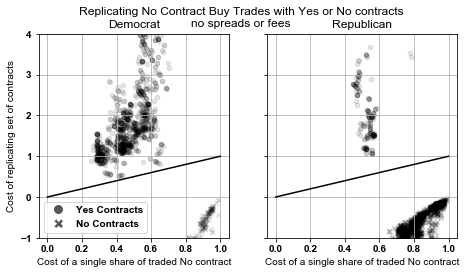

In [10]:
fig = plt.figure(figsize=(7.5, 3.75))

ax1 = plt.subplot(121)

dem_trader_analysis1_no[dem_trader_analysis1_no[('replication', 'd')] > 0].plot.scatter(
    x=('replication', 'N_a'),
    y=('replication', 'max_loss'),
    alpha=0.1, ax=ax1, color='k')
dem_trader_analysis1_no[dem_trader_analysis1_no[('replication', 'd')] < 0].plot.scatter(
    x=('replication', 'N_a'),
    y=('replication', 'max_loss'),
    marker='x',
    alpha=0.1, ax=ax1, color='k')

plt.ylim([-1, 4])

plt.suptitle("Replicating No Contract Buy Trades with Yes or No contracts\nno spreads or fees")
plt.title("Democrat")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.plot([0, 1], [0, 1], c='k')
plt.legend(handles=legend_elements)
plt.grid(True)

ax2 = plt.subplot(122)

rep_trader_analysis1_no[rep_trader_analysis1_no[('replication', 'd')] > 0].plot.scatter(
     x=('replication', 'N_a'),
     y=('replication', 'max_loss'),
     alpha=0.1, ax=ax2, sharey=ax1, color='k')
rep_trader_analysis1_no[rep_trader_analysis1_no[('replication', 'd')] < 0].plot.scatter(
     x=('replication', 'N_a'),
     y=('replication', 'max_loss'),
     marker='x',
     alpha=0.1, ax=ax2, sharey=ax1, color='k')

plt.ylim([-1, 4])

plt.title("Republican")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.plot([0, 1], [0, 1], c='k')
plt.grid(True)

# plt.savefig('charts/pre_margin_all_no_no_spread_no_fees.png', dpi=300)

# Spread but no Fees

In [11]:
dem_trader_analysis2_yes_take = dem_trader_analysis2_yes[
    dem_trader_analysis2_yes.loc[idx[:, ('_trades', 'take_provide')]] == 'T']

dem_trader_analysis2_yes_provide = dem_trader_analysis2_yes[
    dem_trader_analysis2_yes.loc[idx[:, ('_trades', 'take_provide')]] == 'P']

rep_trader_analysis2_yes_take = rep_trader_analysis2_yes[
    rep_trader_analysis2_yes.loc[idx[:, ('_trades', 'take_provide')]] == 'T']

rep_trader_analysis2_yes_provide = rep_trader_analysis2_yes[
    rep_trader_analysis2_yes.loc[idx[:, ('_trades', 'take_provide')]] == 'P']

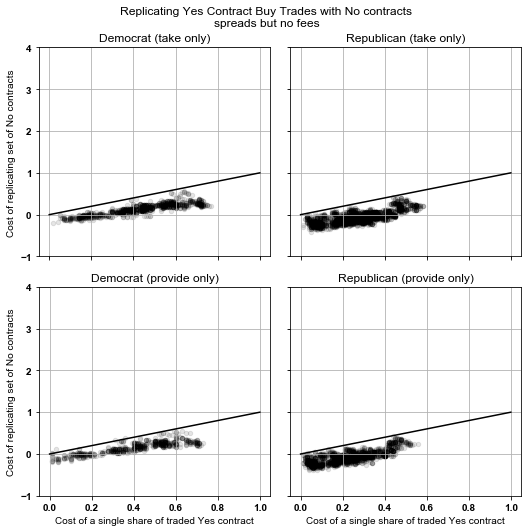

In [12]:
fig = plt.figure(figsize=(7.5, 7.5))

ax3 = plt.subplot(223)

dem_trader_analysis2_yes_provide.plot.scatter(x=('_trades', 'price_per_share'),
                                              y=('replication', 'max_loss'),
                                              alpha=0.1, ax=ax3, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.suptitle("Replicating Yes Contract Buy Trades with No contracts\nspreads but no fees")
plt.title("Democrat (provide only)")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

ax4 = plt.subplot(224)

rep_trader_analysis2_yes_provide.plot.scatter(x=('_trades', 'price_per_share'),
                                              y=('replication', 'max_loss'),
                                              alpha=0.1, ax=ax4, sharey=ax3, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Republican (provide only)")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

ax1 = plt.subplot(221)

dem_trader_analysis2_yes_take.plot.scatter(x=('_trades', 'price_per_share'),
                                           y=('replication', 'max_loss'),
                                           alpha=0.1, ax=ax1, sharex=ax3, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Democrat (take only)")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

ax2 = plt.subplot(222)

rep_trader_analysis2_yes_take.plot.scatter(x=('_trades', 'price_per_share'),
                                           y=('replication', 'max_loss'),
                                           alpha=0.1, ax=ax2, sharey=ax1, sharex=ax4, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Republican (take only)")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.95))

# plt.savefig('charts/pre_margin_all_yes_yes_spread_no_fees.png', dpi=300)

In [13]:
dem_trader_analysis2_no_take = dem_trader_analysis2_no[
    dem_trader_analysis2_no.loc[idx[:, ('_trades', 'take_provide')]] == 'T']

dem_trader_analysis2_no_provide = dem_trader_analysis2_no[
    dem_trader_analysis2_no.loc[idx[:, ('_trades', 'take_provide')]] == 'P']

rep_trader_analysis2_no_take = rep_trader_analysis2_no[
    rep_trader_analysis2_no.loc[idx[:, ('_trades', 'take_provide')]] == 'T']

rep_trader_analysis2_no_provide = rep_trader_analysis2_no[
    rep_trader_analysis2_no.loc[idx[:, ('_trades', 'take_provide')]] == 'P']

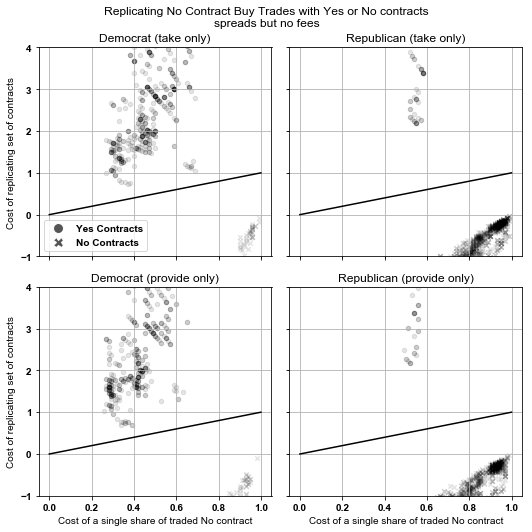

In [14]:
fig = plt.figure(figsize=(7.5, 7.5))

ax3 = plt.subplot(223)

dem_trader_analysis2_no_provide[dem_trader_analysis2_no_provide[('replication', 'd')] > 0].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    alpha=0.1, ax=ax3, color='k')
dem_trader_analysis2_no_provide[dem_trader_analysis2_no_provide[('replication', 'd')] < 0].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    marker='x',
    alpha=0.1, ax=ax3, color='k')

plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.suptitle("Replicating No Contract Buy Trades with Yes or No contracts\nspreads but no fees")
plt.title("Democrat (provide only)")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.grid(True)

ax4 = plt.subplot(224)

rep_trader_analysis2_no_provide[rep_trader_analysis2_no_provide[('replication', 'd')] > 0].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    alpha=0.1, ax=ax4, sharey=ax3, color='k')
rep_trader_analysis2_no_provide[rep_trader_analysis2_no_provide[('replication', 'd')] < 0].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    marker='x',
    alpha=0.1, ax=ax4, sharey=ax3, color='k')

plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Republican (provide only)")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.grid(True)

ax1 = plt.subplot(221)

dem_trader_analysis2_no_take[dem_trader_analysis2_no_take[('replication', 'd')] > 0].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    alpha=0.1, ax=ax1, sharex=ax3, color='k')
dem_trader_analysis2_no_take[dem_trader_analysis2_no_take[('replication', 'd')] < 0].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    marker='x',
    alpha=0.1, ax=ax1, sharex=ax3, color='k')

plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Democrat (take only)")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.legend(handles=legend_elements)
plt.grid(True)

ax2 = plt.subplot(222)

rep_trader_analysis2_no_take[rep_trader_analysis2_no_take[('replication', 'd')] > 0].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    alpha=0.1, ax=ax2, sharey=ax1, sharex=ax4, color='k')
rep_trader_analysis2_no_take[rep_trader_analysis2_no_take[('replication', 'd')] < 0].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    marker='x',
    alpha=0.1, ax=ax2, sharey=ax1, sharex=ax4, color='k')

plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Republican (take only)")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.95))

# plt.savefig('charts/pre_margin_all_no_yes_spread_no_fees.png', dpi=300)

# Spreads and Fees

These are Figures 9 and 10 in the paper.

In [15]:
dem_trader_analysis3_yes_take = dem_trader_analysis3_yes[
    dem_trader_analysis3_yes.loc[idx[:, ('_trades', 'take_provide')]] == 'T']

dem_trader_analysis3_yes_provide = dem_trader_analysis3_yes[
    dem_trader_analysis3_yes.loc[idx[:, ('_trades', 'take_provide')]] == 'P']

rep_trader_analysis3_yes_take = rep_trader_analysis3_yes[
    rep_trader_analysis3_yes.loc[idx[:, ('_trades', 'take_provide')]] == 'T']

rep_trader_analysis3_yes_provide = rep_trader_analysis3_yes[
    rep_trader_analysis3_yes.loc[idx[:, ('_trades', 'take_provide')]] == 'P']

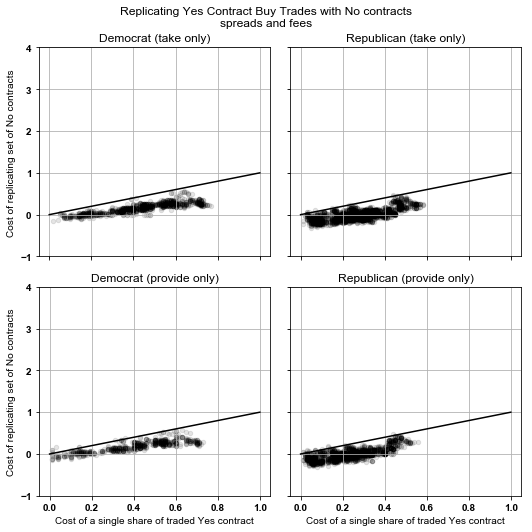

In [16]:
fig = plt.figure(figsize=(7.5, 7.5))

ax3 = plt.subplot(223)

dem_trader_analysis3_yes_provide.plot.scatter(x=('_trades', 'price_per_share'),
                                              y=('replication', 'max_loss'),
                                              alpha=0.1, ax=ax3, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.suptitle("Replicating Yes Contract Buy Trades with No contracts\nspreads and fees")
plt.title("Democrat (provide only)")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

ax4 = plt.subplot(224)

rep_trader_analysis3_yes_provide.plot.scatter(x=('_trades', 'price_per_share'),
                                              y=('replication', 'max_loss'),
                                              alpha=0.1, ax=ax4, sharey=ax3, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Republican (provide only)")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

ax1 = plt.subplot(221)

dem_trader_analysis3_yes_take.plot.scatter(x=('_trades', 'price_per_share'),
                                           y=('replication', 'max_loss'),
                                           alpha=0.1, ax=ax1, sharex=ax3, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Democrat (take only)")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

ax2 = plt.subplot(222)

rep_trader_analysis3_yes_take.plot.scatter(x=('_trades', 'price_per_share'),
                                           y=('replication', 'max_loss'),
                                           alpha=0.1, ax=ax2, sharey=ax1, sharex=ax4, color='k')
plt.ylim([-1, 4])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Republican (take only)")
plt.ylabel("Cost of replicating set of No contracts")
plt.xlabel("Cost of a single share of traded Yes contract")
plt.grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.95))

plt.savefig('charts/pre_margin_all_yes_yes_spread_yes_fees.png', dpi=300)

In [17]:
dem_trader_analysis3_no_take = dem_trader_analysis3_no[
    dem_trader_analysis3_no.loc[idx[:, ('_trades', 'take_provide')]] == 'T']

dem_trader_analysis3_no_provide = dem_trader_analysis3_no[
    dem_trader_analysis3_no.loc[idx[:, ('_trades', 'take_provide')]] == 'P']

rep_trader_analysis3_no_take = rep_trader_analysis3_no[
    rep_trader_analysis3_no.loc[idx[:, ('_trades', 'take_provide')]] == 'T']

rep_trader_analysis3_no_provide = rep_trader_analysis3_no[
    rep_trader_analysis3_no.loc[idx[:, ('_trades', 'take_provide')]] == 'P']

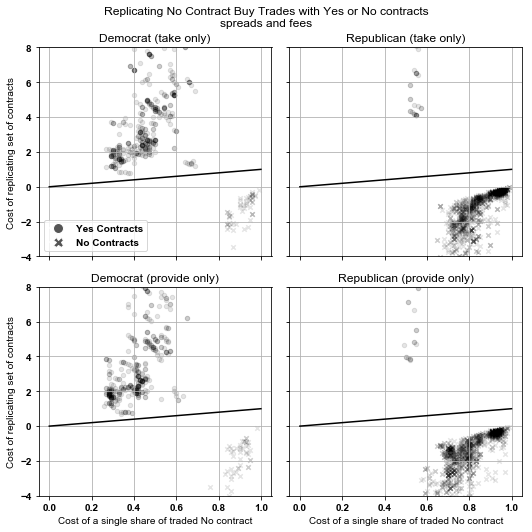

In [18]:
def yes_or_no(d_dict):
    return eval(d_dict)['contracts'] == 'YES'

fig = plt.figure(figsize=(7.5, 7.5))

ax3 = plt.subplot(223)

dem_trader_analysis3_no_provide[dem_trader_analysis3_no_provide[('replication', 'd')].apply(yes_or_no)].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    alpha=0.1, ax=ax3, color='k')
dem_trader_analysis3_no_provide[~dem_trader_analysis3_no_provide[('replication', 'd')].apply(yes_or_no)].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    marker='x',
    alpha=0.1, ax=ax3, color='k')

plt.ylim([-4, 8])
plt.plot([0, 1], [0, 1], c='k')
plt.suptitle("Replicating No Contract Buy Trades with Yes or No contracts\nspreads and fees")
plt.title("Democrat (provide only)")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.grid(True)

ax4 = plt.subplot(224)

rep_trader_analysis3_no_provide[rep_trader_analysis3_no_provide[('replication', 'd')].apply(yes_or_no)].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    alpha=0.1, ax=ax4, sharey=ax3, color='k')
rep_trader_analysis3_no_provide[~rep_trader_analysis3_no_provide[('replication', 'd')].apply(yes_or_no)].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    marker='x',
    alpha=0.1, ax=ax4, sharey=ax3, color='k')

plt.ylim([-4, 8])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Republican (provide only)")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.grid(True)

ax1 = plt.subplot(221)

dem_trader_analysis3_no_take[dem_trader_analysis3_no_take[('replication', 'd')].apply(yes_or_no)].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    alpha=0.1, ax=ax1, sharex=ax3, color='k')
dem_trader_analysis3_no_take[~dem_trader_analysis3_no_take[('replication', 'd')].apply(yes_or_no)].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    marker='x',
    alpha=0.1, ax=ax1, sharex=ax3, color='k')

plt.ylim([-4, 8])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Democrat (take only)")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.legend(handles=legend_elements)
plt.grid(True)

ax2 = plt.subplot(222)

rep_trader_analysis3_no_take[rep_trader_analysis3_no_take[('replication', 'd')].apply(yes_or_no)].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    alpha=0.1, ax=ax2, sharey=ax1, sharex=ax4, color='k')
rep_trader_analysis3_no_take[~rep_trader_analysis3_no_take[('replication', 'd')].apply(yes_or_no)].plot.scatter(
    x=('_trades', 'price_per_share'),
    y=('replication', 'max_loss'),
    marker='x',
    alpha=0.1, ax=ax2, sharey=ax1, sharex=ax4, color='k')

plt.ylim([-4, 8])
plt.plot([0, 1], [0, 1], c='k')
plt.title("Republican (take only)")
plt.ylabel("Cost of replicating set of contracts")
plt.xlabel("Cost of a single share of traded No contract")
plt.grid(True)

plt.tight_layout(rect=(0, 0, 1, 0.95))

plt.savefig('charts/pre_margin_all_no_yes_spread_yes_fees.png', dpi=300)